**Select Right Threshold value using ROC Curve**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [45]:
from sklearn.model_selection import train_test_split
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,100],random_state=1)

In [46]:
x.shape

(2000, 20)

In [47]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [48]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred=rf_model.predict_proba(X_train)
print('RF train ROC-Auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(X_test)
print('RF test ROC-Auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train ROC-Auc: 1.0
RF test ROC-Auc: 0.9828222222222222


In [51]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.05, 0.95],
       ...,
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.23, 0.77]])

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train,y_train)
ytrain_pred=log_classifier.predict_proba(X_train)
print('Logistic train ROC-Auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(X_test)
print('Lodistic test ROC-Auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

Logistic train ROC-Auc: 0.9863589331232614
Lodistic test ROC-Auc: 0.9828222222222222


# Adaboost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred=ada_classifier.predict_proba(X_train)
print('Adaboost train ROC-Auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(X_test)
print('Adaboost test ROC-Auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

Adaboost train ROC-Auc: 0.9926743552432595
Adaboost test ROC-Auc: 0.9828222222222222


# KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
ytrain_pred=knn_classifier.predict_proba(X_train)
print('KNN train ROC-Auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(X_test)
print('KNN test ROC-Auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

KNN train ROC-Auc: 0.981670071491109
KNN test ROC-Auc: 0.9828222222222222


best threshold for max accuracy

In [55]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test ROC-Auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test ROC-Auc: 0.9847888888888889


In [56]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991873,0.669528,1.0
1,0.01,0.000008,0.316455,0.0
2,0.97,0.966763,0.632138,0.8
3,0.92,0.761896,0.533171,0.8
4,0.59,0.779209,0.440650,0.4
...,...,...,...,...
595,0.02,0.024263,0.321128,0.0
596,0.02,0.000003,0.262749,0.0
597,0.98,0.984400,0.605074,1.0
598,0.03,0.001157,0.266081,0.2


In [57]:
pred

[0      0.98
 1      0.01
 2      0.97
 3      0.92
 4      0.59
        ... 
 595    0.02
 596    0.02
 597    0.98
 598    0.03
 599    0.99
 Length: 600, dtype: float64,
 0      0.991873
 1      0.000008
 2      0.966763
 3      0.761896
 4      0.779209
          ...   
 595    0.024263
 596    0.000003
 597    0.984400
 598    0.001157
 599    0.989543
 Length: 600, dtype: float64,
 0      0.669528
 1      0.316455
 2      0.632138
 3      0.533171
 4      0.440650
          ...   
 595    0.321128
 596    0.262749
 597    0.605074
 598    0.266081
 599    0.660185
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [58]:
final_prediction

,0
0,0.910350
1,0.081616
2,0.842225
3,0.753767
4,0.552465
...,...
595,0.091348
596,0.070688
597,0.892368
598,0.124310


In [59]:
# Calculate RoC curve
fpr,tpr,threshold=roc_curve(y_test,final_prediction)
threshold

array([       inf, 0.92789263, 0.9207431 , 0.91835577, 0.82382611,
       0.82211355, 0.81787679, 0.81741304, 0.80373152, 0.80158135,
       0.78589372, 0.78087021, 0.75309598, 0.75195217, 0.7263331 ,
       0.72609565, 0.6741584 , 0.67247295, 0.61196969, 0.60883457,
       0.60511179, 0.60367231, 0.58572548, 0.58550184, 0.57830144,
       0.572393  , 0.56206678, 0.56098082, 0.5524646 , 0.53845293,
       0.50203456, 0.48119513, 0.45196984, 0.45144019, 0.42848027,
       0.37081505, 0.33748471, 0.22060355, 0.21615762, 0.20110061,
       0.19968852, 0.17792759, 0.17659164, 0.08634011, 0.08627288,
       0.05152849])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in threshold:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls=pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['threshold','accuracy']
accuracy_ls.sort_values('accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,threshold,accuracy
33,0.451440,0.960000
34,0.428480,0.960000
32,0.451970,0.958333
31,0.481195,0.958333
30,0.502035,0.956667


In [61]:
accuracy_ls

,threshold,accuracy
33,0.451440,0.960000
34,0.428480,0.960000
32,0.451970,0.958333
31,0.481195,0.958333
30,0.502035,0.956667
27,0.560981,0.955000
28,0.552465,0.953333
29,0.538453,0.953333
26,0.562067,0.953333
25,0.572393,0.951667


In [62]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

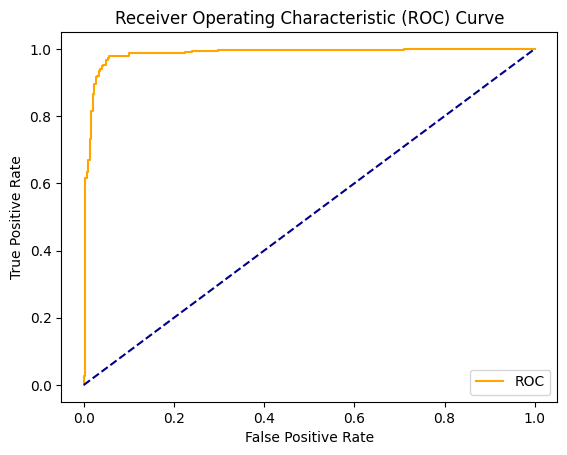

In [63]:
plot_roc_curve(fpr,tpr)